In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
# Importing the required packages 

In [2]:
df1 = pd.read_csv('training_dataset.csv')
df2 = pd.read_csv('validation_dataset.csv')
df3 = pd.read_csv('test_dataset.csv')

In [3]:
frames = [df1, df2, df3] 
finaldataset = pd.concat(frames)

In [4]:
finaldataset

,FOD_ID,NWCG_REPORTING_AGENCY,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,DISCOVERY_DATE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,COUNTY,STAT_CAUSE_CODE
0,1656004,ST/C&L,Georgia Forestry Commission,2002,2002-05-03,Lightning,14.20,C,30.864100,-82.736100,PRIVATE,GA,1025,2002-05-03,1025.0,Clinch,1.0
1,973664,ST/C&L,AFC District 4,2000,2000-02-10,Arson,0.10,A,30.684200,-87.707800,MISSING/NOT SPECIFIED,AL,1496,2000-02-10,2030.0,Baldwin County,7.0
2,1167043,ST/C&L,NCS Region 2 District 6,2000,2000-04-21,Arson,1.00,B,35.150000,-78.483300,MISSING/NOT SPECIFIED,NC,1474,2000-04-21,2252.0,Missing/Undefined,7.0
3,1455401,ST/C&L,Woodruff District,2010,2010-04-02,Powerline,0.20,A,46.027000,-89.529590,PRIVATE,WI,1556,2010-04-02,2059.0,Vilas,11.0
4,1052580,ST/C&L,SCS Unit 6,2001,2001-12-30,Debris Burning,0.80,B,32.737500,-80.202800,MISSING/NOT SPECIFIED,SC,1357,2001-12-30,1558.0,Charleston County,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75216,201621828,ST/C&L,Wisconsin Department of Natural Resources,2012,2012-05-25,Railroad,0.20,A,44.434980,-89.652950,PRIVATE,WI,1512,2012-05-25,1524.0,Portage,6.0
75217,300074520,ST/C&L,Washington Department of Natural Resources,2014,2014-06-03,Lightning,375.00,E,47.963200,-119.686600,STATE,WA,1754,2014-06-18,1258.0,Douglas County,1.0
75218,563567,ST/C&L,North Carolina Division of Forest Resources,2007,2007-10-09,Missing/Undefined,0.10,A,35.592800,-81.318880,MISSING/NOT SPECIFIED,NC,1280,2007-10-09,712.0,Catawba,13.0
75219,300221880,ST/C&L,Idaho Department of Lands,2015,2015-08-10,Lightning,0.25,A,46.525959,-115.699677,PRIVATE,ID,1800,2015-08-14,1230.0,Clearwater,1.0


In [5]:
from sklearn import preprocessing
finaldataset['FIRE_DISCOVERY_MONTH'] = pd.DatetimeIndex(finaldataset['DISCOVERY_DATE']).month
finaldataset['DAY_OF_WEEK'] = pd.to_datetime(finaldataset['DISCOVERY_DATE']).dt.day_name()

In [6]:
finaldataset.columns

Index(['FOD_ID', 'NWCG_REPORTING_AGENCY', 'SOURCE_REPORTING_UNIT_NAME',
       'FIRE_YEAR', 'DISCOVERY_DATE', 'STAT_CAUSE_DESCR', 'FIRE_SIZE',
       'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_DESCR', 'STATE',
       'DISCOVERY_TIME', 'CONT_DATE', 'CONT_TIME', 'COUNTY', 'STAT_CAUSE_CODE',
       'FIRE_DISCOVERY_MONTH', 'DAY_OF_WEEK'],
      dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
enc=LabelEncoder()

In [9]:
finaldataset['DAY_OF_WEEK'] = enc.fit_transform(finaldataset['DAY_OF_WEEK'])
finaldataset['FIRE_DISCOVERY_MONTH'] = enc.fit_transform(finaldataset['FIRE_DISCOVERY_MONTH'])
finaldataset['STATE'] = enc.fit_transform(finaldataset['STATE'])
finaldataset['FIRE_SIZE_CLASS'] = enc.fit_transform(finaldataset['FIRE_SIZE_CLASS'])
finaldataset['NWCG_REPORTING_AGENCY'] = enc.fit_transform(finaldataset['NWCG_REPORTING_AGENCY'])
finaldataset['SOURCE_REPORTING_UNIT_NAME'] = enc.fit_transform(finaldataset['SOURCE_REPORTING_UNIT_NAME'])
finaldataset['FIRE_YEAR'] = enc.fit_transform(finaldataset['FIRE_YEAR'])

In [10]:
finaldataset

,FOD_ID,NWCG_REPORTING_AGENCY,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,DISCOVERY_DATE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,COUNTY,STAT_CAUSE_CODE,FIRE_DISCOVERY_MONTH,DAY_OF_WEEK
0,1656004,8,1207,10,2002-05-03,Lightning,14.20,2,30.864100,-82.736100,PRIVATE,10,1025,2002-05-03,1025.0,Clinch,1.0,4,0
1,973664,8,12,8,2000-02-10,Arson,0.10,0,30.684200,-87.707800,MISSING/NOT SPECIFIED,1,1496,2000-02-10,2030.0,Baldwin County,7.0,1,4
2,1167043,8,2106,8,2000-04-21,Arson,1.00,1,35.150000,-78.483300,MISSING/NOT SPECIFIED,27,1474,2000-04-21,2252.0,Missing/Undefined,7.0,3,0
3,1455401,8,3385,18,2010-04-02,Powerline,0.20,0,46.027000,-89.529590,PRIVATE,49,1556,2010-04-02,2059.0,Vilas,11.0,3,0
4,1052580,8,2683,9,2001-12-30,Debris Burning,0.80,1,32.737500,-80.202800,MISSING/NOT SPECIFIED,41,1357,2001-12-30,1558.0,Charleston County,5.0,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75216,201621828,8,3376,20,2012-05-25,Railroad,0.20,0,44.434980,-89.652950,PRIVATE,49,1512,2012-05-25,1524.0,Portage,6.0,4,0
75217,300074520,8,3255,22,2014-06-03,Lightning,375.00,4,47.963200,-119.686600,STATE,48,1754,2014-06-18,1258.0,Douglas County,1.0,5,5
75218,563567,8,2212,15,2007-10-09,Missing/Undefined,0.10,0,35.592800,-81.318880,MISSING/NOT SPECIFIED,27,1280,2007-10-09,712.0,Catawba,13.0,9,5
75219,300221880,8,1453,23,2015-08-10,Lightning,0.25,0,46.525959,-115.699677,PRIVATE,13,1800,2015-08-14,1230.0,Clearwater,1.0,7,1


In [11]:
X = finaldataset[['FIRE_YEAR','FIRE_DISCOVERY_MONTH','NWCG_REPORTING_AGENCY',
                           'DAY_OF_WEEK','STATE', "FIRE_SIZE_CLASS"]] # Features
y = finaldataset[["STAT_CAUSE_DESCR"]] # Target variable

In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,accuracy_score  
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn import tree

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=10)

In [14]:
tree_model = tree.DecisionTreeClassifier(random_state=10)
tree_model.fit(X_train,y_train)
y_pred = tree_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# cm

In [15]:
print("Accuracy score for Decision Tree:",accuracy_score(y_test,y_pred))
print("Accuracy score for Decision Tree:",accuracy_score(y_test,y_pred))
print("Depth of the Original Tree :" + str(tree_model.get_depth()))
print("No of leaves in the Original Tree :" + str(tree_model.get_n_leaves()))

Accuracy score for Decision Tree: 0.46513606572632643
Accuracy score for Decision Tree: 0.46513606572632643
Depth of the Original Tree :36
No of leaves in the Original Tree :87677


Text(0.5, 1.0, 'Average score: 0.4710037990817587')

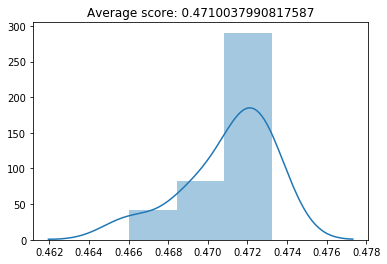

In [16]:
from sklearn.model_selection import cross_val_score

dtc = tree.DecisionTreeClassifier(random_state=10)
cv_scores = cross_val_score(dtc, X, y, cv=10)
sns.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

dct = tree.DecisionTreeClassifier(random_state=10)

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [22,25,28,30,33,35],
                  'max_features': [3, 4, 5]}

cross_validation = StratifiedKFold(n_splits=10)
cross_validation = cross_validation.get_n_splits(X, y)

grid_search = GridSearchCV(dct, param_grid=parameter_grid, cv=cross_validation)

grid_search.fit(X,y)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

dtc = grid_search.best_estimator_
dtc

Best score: 0.4826416332869631
Best parameters: {'criterion': 'gini', 'max_depth': 22, 'max_features': 5, 'splitter': 'best'}


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=22, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

Text(0.5, 1.0, 'Average score: 0.4786347279913266')

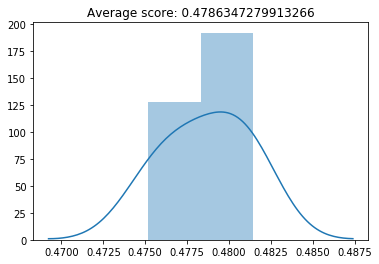

In [18]:
cv_scores = cross_val_score(dtc, X, y)
sns.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

### Grouping labels

In [19]:
finaldataset.loc[finaldataset['STAT_CAUSE_DESCR'] == "Miscellaneous", 'STAT_CAUSE_DESCR'] = "Miscellaneous/Missing/Undefined"
finaldataset.loc[finaldataset['STAT_CAUSE_DESCR'] == "Missing/Undefined", 'STAT_CAUSE_DESCR'] = "Miscellaneous/Missing/Undefined"

In [20]:
finaldataset.loc[finaldataset['STAT_CAUSE_DESCR'] == "Campfire" , 'STAT_CAUSE_DESCR'] = "Campfire/Fireworks/Smoking/DebrisBurning"
finaldataset.loc[finaldataset['STAT_CAUSE_DESCR'] == "Fireworks", 'STAT_CAUSE_DESCR'] = "Campfire/Fireworks/Smoking/DebrisBurning"
finaldataset.loc[finaldataset['STAT_CAUSE_DESCR'] == "Smoking", 'STAT_CAUSE_DESCR'] = "Campfire/Fireworks/Smoking/DebrisBurning"
finaldataset.loc[finaldataset['STAT_CAUSE_DESCR'] == "Debris Burning", 'STAT_CAUSE_DESCR'] = "Campfire/Fireworks/Smoking/DebrisBurning"

In [21]:
finaldataset.loc[finaldataset['STAT_CAUSE_DESCR'] == "Powerline" , 'STAT_CAUSE_DESCR'] = "Powerline/Railroad/Children/Structure/EquipmentUse"
finaldataset.loc[finaldataset['STAT_CAUSE_DESCR'] == "Railroad", 'STAT_CAUSE_DESCR'] = "Powerline/Railroad/Children/Structure/EquipmentUse"
finaldataset.loc[finaldataset['STAT_CAUSE_DESCR'] == "Structure", 'STAT_CAUSE_DESCR'] = "Powerline/Railroad/Children/Structure/EquipmentUse"
finaldataset.loc[finaldataset['STAT_CAUSE_DESCR'] == "Equipment Use", 'STAT_CAUSE_DESCR'] = "Powerline/Railroad/Children/Structure/EquipmentUse"
finaldataset.loc[finaldataset['STAT_CAUSE_DESCR'] == "Children", 'STAT_CAUSE_DESCR'] = "Powerline/Railroad/Children/Structure/EquipmentUse"

In [22]:
finaldataset['STAT_CAUSE_DESCR'].unique()

array(['Lightning', 'Arson',
       'Powerline/Railroad/Children/Structure/EquipmentUse',
       'Campfire/Fireworks/Smoking/DebrisBurning',
       'Miscellaneous/Missing/Undefined'], dtype=object)

In [23]:
X = finaldataset[['FIRE_YEAR','FIRE_DISCOVERY_MONTH','NWCG_REPORTING_AGENCY',
                           'DAY_OF_WEEK','STATE', "FIRE_SIZE_CLASS"]] # Features
y = finaldataset[["STAT_CAUSE_DESCR"]] # Target variable

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=10)

In [25]:
tree_model = tree.DecisionTreeClassifier(random_state=10)
tree_model.fit(X_train,y_train)
y_pred = tree_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# cm

In [26]:
print("Accuracy score for Decision Tree:",accuracy_score(y_test,y_pred))
print("Accuracy score for Decision Tree:",accuracy_score(y_test,y_pred))
print("Depth of the Original Tree :" + str(tree_model.get_depth()))
print("No of leaves in the Original Tree :" + str(tree_model.get_n_leaves()))

Accuracy score for Decision Tree: 0.5186982358649845
Accuracy score for Decision Tree: 0.5186982358649845
Depth of the Original Tree :35
No of leaves in the Original Tree :83960


Text(0.5, 1.0, 'Average score: 0.5224580581901218')

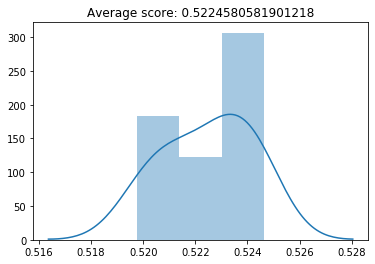

In [27]:
dtc = tree.DecisionTreeClassifier(random_state=10)
cv_scores = cross_val_score(dtc, X, y, cv=10)
sns.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [28]:
dct = tree.DecisionTreeClassifier(random_state=10)

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [22,25,28,30,33,35],
                  'max_features': [3, 4, 5]}

cross_validation = StratifiedKFold(n_splits=10)
cross_validation = cross_validation.get_n_splits(X, y)

grid_search = GridSearchCV(dct, param_grid=parameter_grid, cv=cross_validation)

grid_search.fit(X,y)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

dtc = grid_search.best_estimator_
dtc

Best score: 0.5329898081842596
Best parameters: {'criterion': 'gini', 'max_depth': 22, 'max_features': 5, 'splitter': 'best'}


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=22, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

### Experiments with reducing features along with using grouped labels (from above)

In [41]:
X = finaldataset[['FIRE_YEAR','FIRE_DISCOVERY_MONTH','NWCG_REPORTING_AGENCY',
                           'STATE', "FIRE_SIZE_CLASS"]] # Features
y = finaldataset[["STAT_CAUSE_DESCR"]] # Target variable

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=10)

In [43]:
tree_model = tree.DecisionTreeClassifier(random_state=10)
tree_model.fit(X_train,y_train)
y_pred = tree_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# cm

In [44]:
print("Accuracy score for Decision Tree:",accuracy_score(y_test,y_pred))
print("Accuracy score for Decision Tree:",accuracy_score(y_test,y_pred))
print("Depth of the Original Tree :" + str(tree_model.get_depth()))
print("No of leaves in the Original Tree :" + str(tree_model.get_n_leaves()))

Accuracy score for Decision Tree: 0.5576900067800216
Accuracy score for Decision Tree: 0.5576900067800216
Depth of the Original Tree :31
No of leaves in the Original Tree :35544


In [45]:
dct = tree.DecisionTreeClassifier(random_state=10)

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [22,25,28,30,33,35],
                  'max_features': [3, 4, 5]}

cross_validation = StratifiedKFold(n_splits=10)
cross_validation = cross_validation.get_n_splits(X, y)

grid_search = GridSearchCV(dct, param_grid=parameter_grid, cv=cross_validation)

grid_search.fit(X,y)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

dtc = grid_search.best_estimator_
dtc

Best score: 0.5633034701905244
Best parameters: {'criterion': 'gini', 'max_depth': 22, 'max_features': 4, 'splitter': 'best'}


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=22, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

Text(0.5, 1.0, 'Average score: 0.5617879227248131')

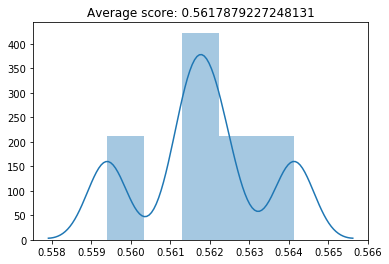

In [47]:
cv_scores = cross_val_score(dtc, X, y)
sns.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))